In [1]:
from typing import Optional, Tuple
from astropy.io import fits
from astropy.table import Table
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import gaussian_kde
import matplotlib.cm as cm
import seaborn as sns
sns.set_theme(style="ticks")

In [2]:
file_ = "../iDR4-SPLUS-PStotal-PSF-185r195_class05_flags4.csv"
df = pd.read_csv(file_)

In [3]:
df

,Field,ID,RA,DEC,X,Y,FWHM,FWHM_n,ISOarea,KRON_RADIUS,...,J0410_psf,e_J0410_psf,J0430_psf,e_J0430_psf,J0515_psf,e_J0515_psf,J0660_psf,e_J0660_psf,J0861_psf,e_J0861_psf
0,b'HYDRA-0011',b'iDR4_3_HYDRA-0011_0000020',150.194980,-24.592107,8918.6210,1019.90894,0.000366,1.181214,5.135031e-07,2.310127,...,NaN,NaN,20.061670,0.134,19.716670,0.104,19.400670,0.067,19.311670,0.144
1,b'HYDRA-0011',b'iDR4_3_HYDRA-0011_0000063',150.094018,-24.590058,9519.6790,1030.60110,0.000385,1.241712,7.235725e-07,4.230926,...,NaN,NaN,NaN,NaN,20.061657,0.108,18.833822,0.059,18.493042,0.079
2,b'HYDRA-0011',b'iDR4_3_HYDRA-0011_0000077',149.986158,-24.587788,10161.8480,1042.06180,0.000367,1.183258,8.869599e-07,3.536005,...,NaN,NaN,NaN,NaN,20.136698,0.148,18.454260,0.052,17.280157,0.057
3,b'HYDRA-0011',b'iDR4_3_HYDRA-0011_0000086',150.201489,-24.587452,8879.9980,1050.54380,0.000359,1.159371,4.434800e-07,3.316674,...,NaN,NaN,NaN,NaN,NaN,NaN,19.155775,0.066,18.551565,0.085
4,b'HYDRA-0011',b'iDR4_3_HYDRA-0011_0000098',150.499011,-24.587159,7108.9610,1057.85270,0.000340,1.097743,4.901620e-07,3.033429,...,NaN,NaN,NaN,NaN,20.164549,0.144,19.369873,0.056,19.061623,0.105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3789534,b'STRIPE82-0170',b'iDR4_3_STRIPE82-0170_0048245',357.908715,1.304728,9911.1930,9459.45500,0.000318,0.988061,4.434800e-07,4.622086,...,20.113150,0.136,19.895151,0.119,19.623150,0.085,19.643623,0.058,19.265713,0.096
3789535,b'STRIPE82-0170',b'iDR4_3_STRIPE82-0170_0048466',358.342098,1.308769,7074.8850,9485.39700,0.000323,1.003624,5.135031e-07,4.170736,...,NaN,NaN,NaN,NaN,20.527985,0.121,19.414244,0.059,18.865046,0.069
3789536,b'STRIPE82-0170',b'iDR4_3_STRIPE82-0170_0048686',358.721632,1.300324,4591.1567,9430.06500,0.000311,0.965750,9.336420e-07,3.466481,...,NaN,NaN,NaN,NaN,20.019457,0.082,18.730637,0.047,17.443651,0.034
3789537,b'STRIPE82-0170',b'iDR4_3_STRIPE82-0170_0048666',358.718901,1.308302,4609.0303,9482.28900,0.000320,0.994871,8.869599e-07,3.626253,...,NaN,NaN,NaN,NaN,20.035624,0.081,18.817636,0.050,17.474651,0.038


In [4]:
# Remove magelanic clouds
filtered_df = df[~df['Field'].str.contains('MC')]

In [5]:
filtered_df

,Field,ID,RA,DEC,X,Y,FWHM,FWHM_n,ISOarea,KRON_RADIUS,...,J0410_psf,e_J0410_psf,J0430_psf,e_J0430_psf,J0515_psf,e_J0515_psf,J0660_psf,e_J0660_psf,J0861_psf,e_J0861_psf
0,b'HYDRA-0011',b'iDR4_3_HYDRA-0011_0000020',150.194980,-24.592107,8918.6210,1019.90894,0.000366,1.181214,5.135031e-07,2.310127,...,NaN,NaN,20.061670,0.134,19.716670,0.104,19.400670,0.067,19.311670,0.144
1,b'HYDRA-0011',b'iDR4_3_HYDRA-0011_0000063',150.094018,-24.590058,9519.6790,1030.60110,0.000385,1.241712,7.235725e-07,4.230926,...,NaN,NaN,NaN,NaN,20.061657,0.108,18.833822,0.059,18.493042,0.079
2,b'HYDRA-0011',b'iDR4_3_HYDRA-0011_0000077',149.986158,-24.587788,10161.8480,1042.06180,0.000367,1.183258,8.869599e-07,3.536005,...,NaN,NaN,NaN,NaN,20.136698,0.148,18.454260,0.052,17.280157,0.057
3,b'HYDRA-0011',b'iDR4_3_HYDRA-0011_0000086',150.201489,-24.587452,8879.9980,1050.54380,0.000359,1.159371,4.434800e-07,3.316674,...,NaN,NaN,NaN,NaN,NaN,NaN,19.155775,0.066,18.551565,0.085
4,b'HYDRA-0011',b'iDR4_3_HYDRA-0011_0000098',150.499011,-24.587159,7108.9610,1057.85270,0.000340,1.097743,4.901620e-07,3.033429,...,NaN,NaN,NaN,NaN,20.164549,0.144,19.369873,0.056,19.061623,0.105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3789534,b'STRIPE82-0170',b'iDR4_3_STRIPE82-0170_0048245',357.908715,1.304728,9911.1930,9459.45500,0.000318,0.988061,4.434800e-07,4.622086,...,20.113150,0.136,19.895151,0.119,19.623150,0.085,19.643623,0.058,19.265713,0.096
3789535,b'STRIPE82-0170',b'iDR4_3_STRIPE82-0170_0048466',358.342098,1.308769,7074.8850,9485.39700,0.000323,1.003624,5.135031e-07,4.170736,...,NaN,NaN,NaN,NaN,20.527985,0.121,19.414244,0.059,18.865046,0.069
3789536,b'STRIPE82-0170',b'iDR4_3_STRIPE82-0170_0048686',358.721632,1.300324,4591.1567,9430.06500,0.000311,0.965750,9.336420e-07,3.466481,...,NaN,NaN,NaN,NaN,20.019457,0.082,18.730637,0.047,17.443651,0.034
3789537,b'STRIPE82-0170',b'iDR4_3_STRIPE82-0170_0048666',358.718901,1.308302,4609.0303,9482.28900,0.000320,0.994871,8.869599e-07,3.626253,...,NaN,NaN,NaN,NaN,20.035624,0.081,18.817636,0.050,17.474651,0.038


In [6]:
# Convert the data into an Astropy Table
tab = Table.from_pandas(filtered_df)
len(tab)

2585875

In [7]:
tab.colnames

['Field',
 'ID',
 'RA',
 'DEC',
 'X',
 'Y',
 'FWHM',
 'FWHM_n',
 'ISOarea',
 'KRON_RADIUS',
 'MU_MAX_INST',
 'PETRO_RADIUS',
 'SEX_FLAGS_DET',
 'SEX_NUMBER_DET',
 'CLASS_STAR',
 's2n_DET_PStotal',
 'THETA',
 'ELLIPTICITY',
 'ELONGATION',
 'FLUX_RADIUS_20',
 'FLUX_RADIUS_50',
 'FLUX_RADIUS_70',
 'FLUX_RADIUS_90',
 's2n_r_PStotal',
 's2n_J0660_PStotal',
 's2n_i_PStotal',
 'FWHM_r',
 'FWHM_n_r',
 'FWHM_J0660',
 'FWHM_n_J0660',
 'FWHM_i',
 'FWHM_n_i',
 'SEX_FLAGS_r',
 'SEX_FLAGS_J0660',
 'SEX_FLAGS_i',
 'CLASS_STAR_r',
 'CLASS_STAR_J0660',
 'CLASS_STAR_i',
 'r_PStotal',
 'e_r_PStotal',
 'g_PStotal',
 'e_g_PStotal',
 'i_PStotal',
 'e_i_PStotal',
 'u_PStotal',
 'e_u_PStotal',
 'z_PStotal',
 'e_z_PStotal',
 'J0378_PStotal',
 'e_J0378_PStotal',
 'J0395_PStotal',
 'e_J0395_PStotal',
 'J0410_PStotal',
 'e_J0410_PStotal',
 'J0430_PStotal',
 'e_J0430_PStotal',
 'J0515_PStotal',
 'e_J0515_PStotal',
 'J0660_PStotal',
 'e_J0660_PStotal',
 'J0861_PStotal',
 'e_J0861_PStotal',
 'r_psf',
 'e_r_psf',
 'g

In [8]:
# See the dimesion of the CCD
print(tab['X'].max())
print(tab['Y'].max())

10675.3545
10400.392


In [9]:
# Masking, usar FLATS menor que 4
# Masking
m_x =  (tab["J0660_PStotal"] <= 19.4) & (tab["i_PStotal"] <= 19.2)

m_err = (tab["e_r_PStotal"] <= 0.2) &  \
        (tab["e_J0660_PStotal"] <= 0.2) & \
        (tab["e_i_PStotal"] <= 0.2)


m_sn = (tab["s2n_r_PStotal"] >= 10) & \
       (tab["s2n_J0660_PStotal"] >= 10) & \
        (tab["s2n_i_PStotal"] >= 10)

m_ell = (tab["ELLIPTICITY"]) <= 0.2

m_50 = (tab["FLUX_RADIUS_50"]) <= 3

valid_ellipticity_range = (0.1, 0.8)  # Example valid range for ellipticity
valid_elongation_range = (1.0, 3.0)   # Example valid range for elongation
shape_mask = (tab['ELLIPTICITY'] >= valid_ellipticity_range[0]) & \
             (tab['ELLIPTICITY'] <= valid_ellipticity_range[1]) & \
             (tab['ELONGATION'] >= valid_elongation_range[0]) & \
             (tab['ELONGATION'] <= valid_elongation_range[1])

valid_fwhm_range = (0.0008, 1000.0)  # Example valid range for FWHM in pixels
fwhm_mask = (tab['FWHM'] >= valid_fwhm_range[0]) & \
            (tab['FWHM'] <= valid_fwhm_range[1])

mask = m_x & m_err & m_sn & m_ell & m_50# Use fwhm_mask instead of valid_fwhm_range
tab_clean = tab[mask]


In [10]:
len(tab_clean)

2217375

In [11]:
# Define the dimensions of your CCD
ccd_width = int(tab_clean['X'].max())  # Replace with the actual width of your CCD image
ccd_height = int(tab_clean['Y'].max())  # Replace with the actual height of your CCD image

# Define the buffer zone size for corner removal
buffer_size = 50  # Adjust as needed

# Define the corners of the CCD
corners = [(0, 0), (0, ccd_height), (ccd_width, 0), (ccd_width, ccd_height)]

# Create a mask to identify objects in the corners
corner_mask = np.zeros(len(tab_clean), dtype=bool)

for corner in corners:
    corner_x, corner_y = corner
    corner_distance = np.sqrt((tab_clean['X'] - corner_x)**2 + (tab_clean['Y'] - corner_y)**2)
    corner_mask |= corner_distance < buffer_size

# Apply the corner mask to filter out objects in the corners
tab_clean_filtered = tab_clean[~corner_mask]


In [12]:
tab_clean_filtered

Field,ID,RA,DEC,X,Y,FWHM,FWHM_n,ISOarea,KRON_RADIUS,MU_MAX_INST,PETRO_RADIUS,SEX_FLAGS_DET,SEX_NUMBER_DET,CLASS_STAR,s2n_DET_PStotal,THETA,ELLIPTICITY,ELONGATION,FLUX_RADIUS_20,FLUX_RADIUS_50,FLUX_RADIUS_70,FLUX_RADIUS_90,s2n_r_PStotal,s2n_J0660_PStotal,s2n_i_PStotal,FWHM_r,FWHM_n_r,FWHM_J0660,FWHM_n_J0660,FWHM_i,FWHM_n_i,SEX_FLAGS_r,SEX_FLAGS_J0660,SEX_FLAGS_i,CLASS_STAR_r,CLASS_STAR_J0660,CLASS_STAR_i,r_PStotal,e_r_PStotal,g_PStotal,e_g_PStotal,i_PStotal,e_i_PStotal,u_PStotal,e_u_PStotal,z_PStotal,e_z_PStotal,J0378_PStotal,e_J0378_PStotal,J0395_PStotal,e_J0395_PStotal,J0410_PStotal,e_J0410_PStotal,J0430_PStotal,e_J0430_PStotal,J0515_PStotal,e_J0515_PStotal,J0660_PStotal,e_J0660_PStotal,J0861_PStotal,e_J0861_PStotal,r_psf,e_r_psf,g_psf,e_g_psf,i_psf,e_i_psf,u_psf,e_u_psf,z_psf,e_z_psf,J0378_psf,e_J0378_psf,J0395_psf,e_J0395_psf,J0410_psf,e_J0410_psf,J0430_psf,e_J0430_psf,J0515_psf,e_J0515_psf,J0660_psf,e_J0660_psf,J0861_psf,e_J0861_psf
str16,str31,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
b'HYDRA-0011',b'iDR4_3_HYDRA-0011_0000020',150.19497968621027,-24.592107383540625,8918.621,1019.90894,0.00036607738,1.1812137,5.135031e-07,2.310127,17.83206,3.9599998,0,20,0.988736,-1.0,41.352543,0.11955023,1.1357832,0.70819265,1.234947,1.6100334,2.2678754,42.49532,24.285816,35.273926,0.00035442476,1.2242066,0.0003782962,1.304918,0.00036666426,1.160143,0,0,0,1,1.0,1,19.219204,0.025555754,19.644085,0.03567794,19.178638,0.030787615,20.491447,0.12449377,19.09263,0.049254086,20.311045,0.18252768,19.828053,0.18322667,20.541628,0.26889068,20.13356,0.17839868,19.547329,0.0846757,19.319563,0.04471746,19.267485,0.10074351,19.36067,0.058,19.76667,0.061,19.24467,0.063,20.43267,0.112,19.18367,0.086,--,--,19.86467,0.155,--,--,20.06167,0.134,19.71667,0.104,19.40067,0.067,19.31167,0.144
b'HYDRA-0011',b'iDR4_3_HYDRA-0011_0000063',150.09401805512448,-24.59005759091408,9519.679,1030.6011,0.00038482685,1.2417122,7.2357255e-07,4.2309265,17.48027,3.3,0,63,0.99048156,-1.0,19.07184,0.11371052,1.1282995,0.8172595,1.5485404,2.2095222,4.9878054,58.312347,39.687847,61.738495,0.00038281042,1.3222525,0.00034714577,1.1974659,0.00037575953,1.1889209,0,0,0,1,1.0,1,18.791534,0.019286895,19.770855,0.041691564,18.446728,0.018680943,21.765713,0.37361535,18.228205,0.024886902,22.006365,0.810427,20.716404,0.38922054,20.857758,0.38066193,20.47013,0.25893736,19.817791,0.112359844,18.664236,0.028337745,18.37708,0.049164996,18.981678,0.047,20.011658,0.072,18.569014,0.048,--,--,18.392042,0.067,--,--,--,--,--,--,--,--,20.061657,0.108,18.833822,0.059,18.493042,0.079
b'HYDRA-0011',b'iDR4_3_HYDRA-0011_0000077',149.9861583611236,-24.58778759681889,10161.848,1042.0618,0.00036671112,1.1832585,8.869599e-07,3.536005,16.754494,3.9599998,2,77,0.9819936,-1.0,39.017437,0.03024447,1.0311877,0.7450429,1.344275,1.8108876,2.919434,58.82124,48.298035,107.35575,0.00036566184,1.2630202,0.0003242045,1.1183308,0.00035709323,1.1298598,2,2,2,1,1.0,1,18.746857,0.019311868,20.071503,0.054456882,17.592365,0.010837416,23.87035,2.6446593,17.060974,0.010657566,23.438414,3.1295917,99.0,99.0,21.966246,1.0941789,21.616673,0.75158554,20.039974,0.1402535,18.328432,0.023519544,17.178415,0.020337619,18.90326,0.056,20.304697,0.083,17.716269,0.042,--,--,17.187159,0.048,--,--,--,--,--,--,--,--,20.136698,0.148,18.45426,0.052,17.280157,0.057
b'HYDRA-0011',b'iDR4_3_HYDRA-0011_0000086',150.20148866809072,-24.58745240535304

In [13]:
ri = tab_clean["r_PStotal"] - tab_clean["i_PStotal"]
rj660 = tab_clean["r_PStotal"] - tab_clean["J0660_PStotal"]

In [14]:
def equation(m, c, x):
    # Define your equation here, for example, a linear equation: y = mx + c
    y = m * x + c
    return y

In [15]:
def plots(
    color1: np.ndarray,
    color2: np.ndarray,
    x_values: np.ndarray,
    y_values: np.ndarray,
    y_values1: Optional[np.ndarray] = None,
    sample_size: Optional[int] = None,
    xlim: Optional[Tuple[float, float]] = None,
    ylim: Optional[Tuple[float, float]] = None,
    density_method: str = "gaussian_kde",
    colormap: str = "viridis",
    label1: str = None,
    label2: str = None,
    label3: str = None,
    title: str = "Scatter Plot with Density Coloring"
) -> None:
    """
    Plots a scatter plot with points colored based on their density and one or two lines 
    defined by x_values, y_values, and optionally y_values1.
    """

    # Handle sampling and duplicate colors, ensuring equal lengths
    if sample_size is not None:
        unique_indices = np.random.choice(len(color1), size=sample_size, replace=False)
        color1, color2 = color1[unique_indices], color2[unique_indices]

    # Calculate density
    xy = np.vstack([color1, color2])
    if density_method == "gaussian_kde":
        density = gaussian_kde(xy)(xy)
    else:
        raise NotImplementedError(f"Density method {density_method} not supported.")

    # Sort points by density
    sorted_indices = density.argsort()[::-1]  # Descending order
    color1, color2, density = color1[sorted_indices], color2[sorted_indices], density[sorted_indices]

    # Create plot
    fig, ax = plt.subplots(figsize=(14, 11))

    # Customize scatter plot
    scatter_collection = ax.scatter(
        color1,
        color2,
        c=density,
        s=10,
        cmap=colormap,
        alpha=0.8,
        label=label1 if label1 else "Color 1"
    )

    # Customize colorbar
    plt.colorbar(scatter_collection, label="Density")

    # Customize line plots
    plt.plot(x_values, y_values, linewidth=2, color="red", label=label2 if label2 else "Line 1")
    if y_values1 is not None:
        plt.plot(x_values, y_values1, linewidth=2, color="blue", label=label3 if label3 else "Line 2")

    # Set limits
    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)

    # Add labels and title
    plt.xlabel(label1 if label1 else "Color 1")
    plt.ylabel(label2 if label2 else "Color 2")
    plt.title(title)

    # Add legend if labels are provided
    if label1 or label2 or label3:
        plt.legend()

    plt.show()

In [16]:
# Generate x values
x_values = np.linspace(-10, 10, 100)  # Generate 100 x values from 0 to 10

# Compute y values using the equation
y_values = equation(0.35, -0.35, x_values)

In [17]:
y_values1 = equation(0.35, 0.30, x_values)

In [18]:
print(len(ri), len(rj660), len(x_values), len(y_values), len(y_values1))

2217375 2217375 100 100 100


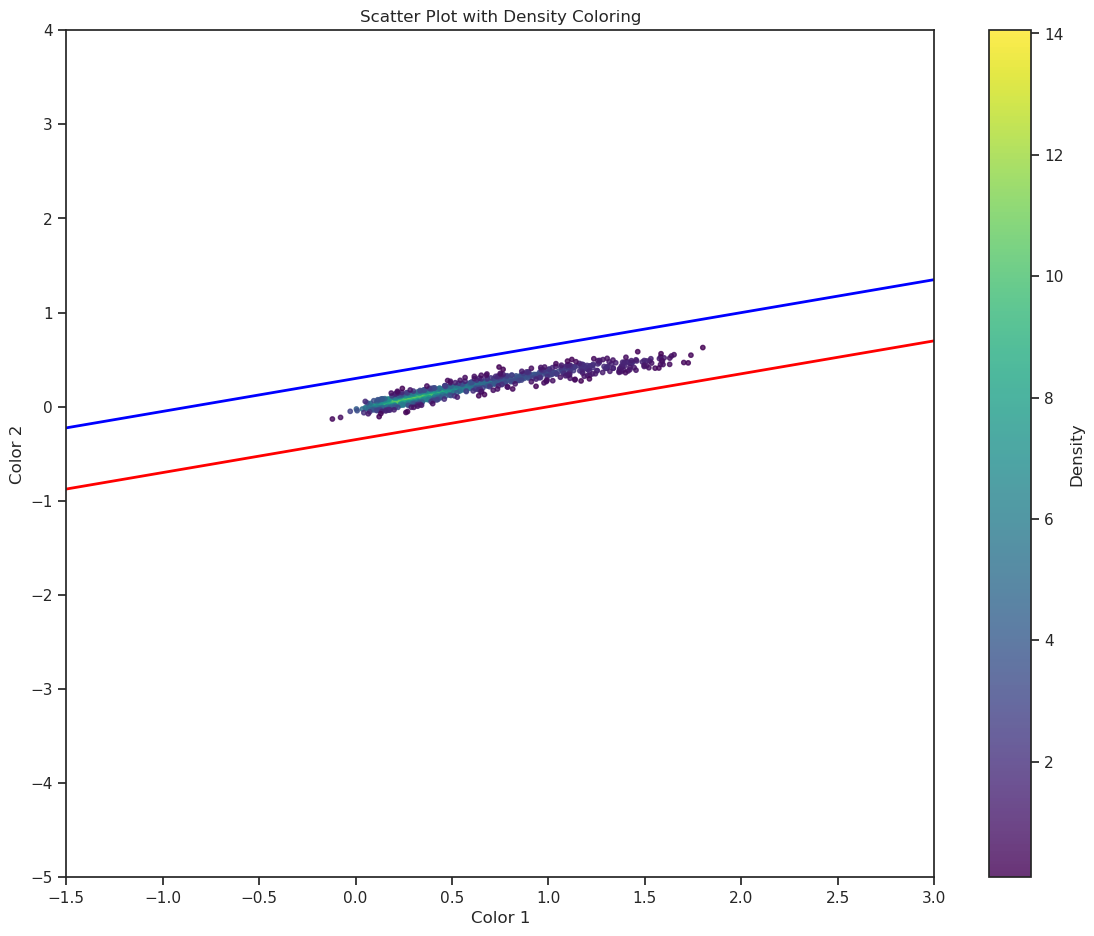

In [19]:
plots(ri, rj660, x_values, y_values, y_values1, xlim=(-1.5, 3), ylim=(-5, 4), sample_size=1000)

In [20]:
# Select objects below the line
# below_line = rj660 < equation(ri)
color_crit = (rj660  <= 0.35*ri - 0.35)

# upper_line = rj660 < equation(ri)
color_crit_upper = (rj660 >= 0.35*ri + 0.30)

In [21]:
tab_clean_below = tab_clean[color_crit]

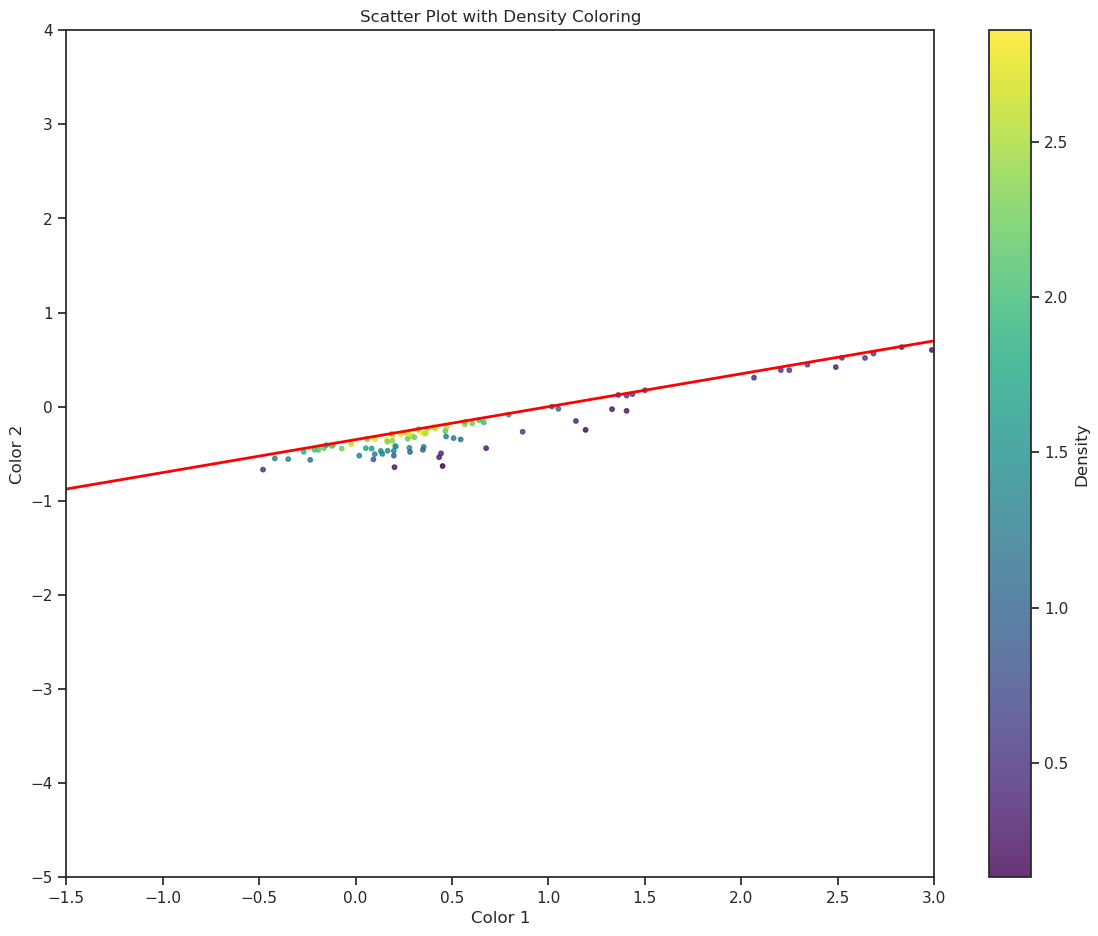

In [22]:
ri_below = tab_clean_below["r_PStotal"] - tab_clean_below["i_PStotal"]
rj660_below = tab_clean_below["r_PStotal"] - tab_clean_below["J0660_PStotal"]



plots(ri_below, rj660_below, x_values, y_values, xlim=(-1.5, 3), ylim=(-5, 4))


In [23]:
tab_clean_below

Field,ID,RA,DEC,X,Y,FWHM,FWHM_n,ISOarea,KRON_RADIUS,MU_MAX_INST,PETRO_RADIUS,SEX_FLAGS_DET,SEX_NUMBER_DET,CLASS_STAR,s2n_DET_PStotal,THETA,ELLIPTICITY,ELONGATION,FLUX_RADIUS_20,FLUX_RADIUS_50,FLUX_RADIUS_70,FLUX_RADIUS_90,s2n_r_PStotal,s2n_J0660_PStotal,s2n_i_PStotal,FWHM_r,FWHM_n_r,FWHM_J0660,FWHM_n_J0660,FWHM_i,FWHM_n_i,SEX_FLAGS_r,SEX_FLAGS_J0660,SEX_FLAGS_i,CLASS_STAR_r,CLASS_STAR_J0660,CLASS_STAR_i,r_PStotal,e_r_PStotal,g_PStotal,e_g_PStotal,i_PStotal,e_i_PStotal,u_PStotal,e_u_PStotal,z_PStotal,e_z_PStotal,J0378_PStotal,e_J0378_PStotal,J0395_PStotal,e_J0395_PStotal,J0410_PStotal,e_J0410_PStotal,J0430_PStotal,e_J0430_PStotal,J0515_PStotal,e_J0515_PStotal,J0660_PStotal,e_J0660_PStotal,J0861_PStotal,e_J0861_PStotal,r_psf,e_r_psf,g_psf,e_g_psf,i_psf,e_i_psf,u_psf,e_u_psf,z_psf,e_z_psf,J0378_psf,e_J0378_psf,J0395_psf,e_J0395_psf,J0410_psf,e_J0410_psf,J0430_psf,e_J0430_psf,J0515_psf,e_J0515_psf,J0660_psf,e_J0660_psf,J0861_psf,e_J0861_psf
str16,str31,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
b'HYDRA-0042',b'iDR4_3_HYDRA-0042_0011223',155.21754588239384,-28.502227790110084,1449.1865,2707.008,0.0005355327,1.1779419,1.1903936e-06,4.210053,17.174135,5.2799997,0,11223,0.97777015,-1.0,87.525085,0.04998243,1.0526121,1.1577551,2.2307441,3.181346,5.8065467,51.668407,32.678898,41.707283,0.0005283214,1.1984909,0.00052127213,1.1955278,0.00054692413,1.2091671,0,0,0,1,1.0,1,18.601109,0.020548739,19.074608,0.028729958,18.470602,0.02554844,19.506649,0.049252678,18.678785,0.05005802,19.257591,0.06257532,19.42831,0.10731169,19.223927,0.08026526,19.380192,0.08616564,19.167868,0.061997198,19.071026,0.032489486,18.797287,0.06962624,18.673275,0.037,19.137133,0.039,18.539316,0.046,19.566603,0.062,18.74393,0.088,19.379602,0.067,19.501602,0.098,19.418133,0.09,19.492132,0.09,19.330132,0.062,19.142275,0.05,18.871931,0.094
b'HYDRA-0084',b'iDR4_3_HYDRA-0084_0061569',162.95497397858398,-32.94827086867687,1647.2712,9813.448,0.00035372836,1.0276164,6.302084e-07,3.5253775,17.118813,3.9599998,0,61569,0.9755414,-1.0,65.23355,0.029585183,1.0304872,0.77340996,1.4233323,1.9697142,3.2734401,45.416367,27.868565,56.284843,0.00039584594,1.0782391,0.0004069696,1.0766995,0.0003407203,1.0326285,0,0,0,1,1.0,1,18.646523,0.024100898,19.541454,0.055628248,18.29339,0.019708704,20.85443,0.23334008,18.139109,0.046517175,21.11978,0.46778053,21.124962,0.7054273,20.866222,0.54802066,20.200104,0.27235016,19.989927,0.18045186,19.07348,0.039276347,18.480928,0.04751427,18.673903,0.055,19.580555,0.083,18.308414,0.042,--,--,18.220848,0.088,--,--,--,--,--,--,--,--,--,--,19.090902,0.07,18.542849,0.07
b'HYDRA-0084',b'iDR4_3_HYDRA-0084_0065581',162.7215955426351,-33.10272530486888,2933.88,8809.472,0.00033589118,0.97579753,6.7689047e-07,3.5530267,16.945314,4.62,0,65581,0.9785978,-1.0,-84.83534,0.05081278,1.053533,0.7248036,1.3359753,1.8293415,2.7748978,47.67965,27.5578,62.759407,0.00036439463,0.99256927,0.00037783358,0.9996158,0.0003315218,1.0047504,0,0,0,1,1.0,1,18.62952,0.02253278,19.672707,0.057003256,18.186382,0.01743988,22.11894,0.74358565,18.015623,0.024339132,21.024746,0.43545425,24.764051,19.860588,20.378796,0.31930518,20.754183,0.40885693,19.885454,0.1523359,19.124979,0.038985513,18.361197,0.04265864,18.646183,0.057,19.558928,0.083,18.186089,0.044,--,--,18.023897,0.055,--,--,--,--,--,--,--,--,--,--,19.163183,0.058,18.410896,0.065
b'HYDRA-0095',b'iDR4_3_HYDRA-0095_0000138',151.0462

In [24]:
tab_clean_upper = tab_clean[color_crit_upper]
tab_clean_upper

Field,ID,RA,DEC,X,Y,FWHM,FWHM_n,ISOarea,KRON_RADIUS,MU_MAX_INST,PETRO_RADIUS,SEX_FLAGS_DET,SEX_NUMBER_DET,CLASS_STAR,s2n_DET_PStotal,THETA,ELLIPTICITY,ELONGATION,FLUX_RADIUS_20,FLUX_RADIUS_50,FLUX_RADIUS_70,FLUX_RADIUS_90,s2n_r_PStotal,s2n_J0660_PStotal,s2n_i_PStotal,FWHM_r,FWHM_n_r,FWHM_J0660,FWHM_n_J0660,FWHM_i,FWHM_n_i,SEX_FLAGS_r,SEX_FLAGS_J0660,SEX_FLAGS_i,CLASS_STAR_r,CLASS_STAR_J0660,CLASS_STAR_i,r_PStotal,e_r_PStotal,g_PStotal,e_g_PStotal,i_PStotal,e_i_PStotal,u_PStotal,e_u_PStotal,z_PStotal,e_z_PStotal,J0378_PStotal,e_J0378_PStotal,J0395_PStotal,e_J0395_PStotal,J0410_PStotal,e_J0410_PStotal,J0430_PStotal,e_J0430_PStotal,J0515_PStotal,e_J0515_PStotal,J0660_PStotal,e_J0660_PStotal,J0861_PStotal,e_J0861_PStotal,r_psf,e_r_psf,g_psf,e_g_psf,i_psf,e_i_psf,u_psf,e_u_psf,z_psf,e_z_psf,J0378_psf,e_J0378_psf,J0395_psf,e_J0395_psf,J0410_psf,e_J0410_psf,J0430_psf,e_J0430_psf,J0515_psf,e_J0515_psf,J0660_psf,e_J0660_psf,J0861_psf,e_J0861_psf
str16,str31,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
b'HYDRA-0013',b'iDR4_3_HYDRA-0013_0015750',154.55904140699806,-24.256091764971718,1246.0208,3215.7234,0.0002608559,0.8009654,5.601852e-07,3.4241562,16.026388,3.9599998,0,15750,0.9742901,-1.0,37.11003,0.04210341,1.043954,0.6110618,1.1610663,1.5885786,2.6992788,57.12283,67.088066,65.69618,0.000290056,0.8258366,0.0006906455,1.7512255,0.00023852418,0.7444194,0,0,0,1,--,1,18.725115,0.018554553,20.033792,0.047283594,18.18157,0.016068418,22.863035,0.6916882,17.938082,0.022842089,22.617895,0.930669,21.999432,0.85061777,21.248428,0.4264963,21.21369,0.35995108,19.967403,0.09889784,18.128681,0.015798466,17.942852,0.02873045,18.785212,0.043,20.070498,0.054,18.235395,0.047,--,--,--,--,--,--,--,--,--,--,--,--,20.14362,0.102,--,--,--,--
b'HYDRA-0014',b'iDR4_3_HYDRA-0014_0033904',155.18570211300965,-23.884339417681463,6690.9863,5659.076,0.00029497963,0.9133606,6.7689047e-07,3.6907294,16.668015,3.9599998,0,33904,0.96450037,-1.0,-12.429429,0.008967936,1.009049,0.66757023,1.3460481,1.8802547,3.4147673,50.331,65.2182,53.532627,0.0002954241,0.93830705,0.0006046861,1.916331,0.00028135927,0.91244763,0,0,0,1,1.0,1,19.133059,0.021903895,20.060163,0.04612928,18.76215,0.020173667,22.840084,0.6668771,18.612537,0.030275516,21.962994,0.5372899,21.45752,0.5425292,20.986996,0.30224434,20.380991,0.17308743,20.245783,0.11969905,18.47196,0.016903944,18.650805,0.038928684,19.19317,0.04,20.134447,0.053,18.807364,0.037,--,--,18.659807,0.058,--,--,--,--,--,--,--,--,20.129152,0.091,18.783773,0.103,18.771698,0.057
b'HYDRA-0017',b'iDR4_3_HYDRA-0017_0004783',159.4788483340852,-24.429062901971516,8606.478,2088.5144,0.0007102793,1.1609415,7.7025464e-07,4.263974,18.0573,5.9399996,0,4783,0.73391217,-1.0,30.993746,0.13703,1.1587889,1.3180327,2.578093,3.778212,7.128442,24.148062,29.30763,20.319769,0.0007898301,1.1836306,0.00074777415,1.0218858,0.0008671501,1.4681003,0,0,0,1,1.0,1,19.199686,0.04493481,20.573019,0.12500131,18.984,0.053876888,21.854004,0.4921644,18.195797,0.048096146,21.252352,0.41991028,20.562693,0.35094002,22.099607,1.4786229,20.854721,0.4397848,20.21483,0.20992218,18.69878,0.037024096,18.249996,0.063818544,19.245457,0.063,--,--,19.101635,0.081,--,--,18.33006,0.088,--,--,--,--,--,--,--,--,--,--,18.760456,0.051,18.28706,0.091
b'HYDRA-0017',b'iDR4_3_HYDRA-0017_0009083',160.646313485236,-24.25445559566249,1643.3098,3228.3699,0.00058920344,0.96304476,8.869599e-07,4.031962,1

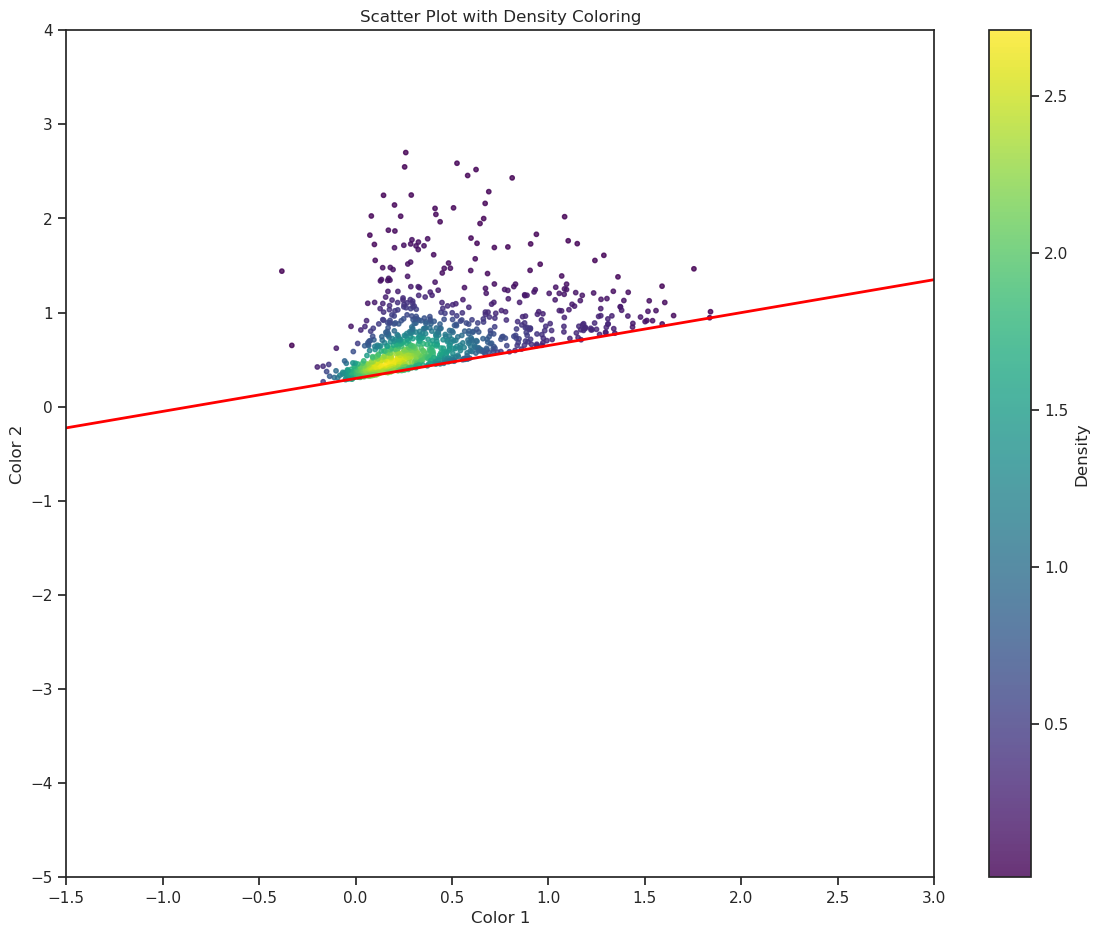

In [25]:
ri_upper = tab_clean_upper["r_PStotal"] - tab_clean_upper["i_PStotal"]
rj660_upper = tab_clean_upper["r_PStotal"] - tab_clean_upper["J0660_PStotal"]


plots(ri_upper, rj660_upper, x_values, y_values1, xlim=(-1.5, 3), ylim=(-5, 4))


In [26]:
len(tab_clean_below["Field"])
   

89

In [27]:
# Saving
# Save the table as a CSV file
#tab_clean_below.write('iDR4-SPLUS-PStotal-PSF-16r175_class06_flags4_bellow.csv', format='csv', overwrite=True)


Examining the position of these object on the CCD

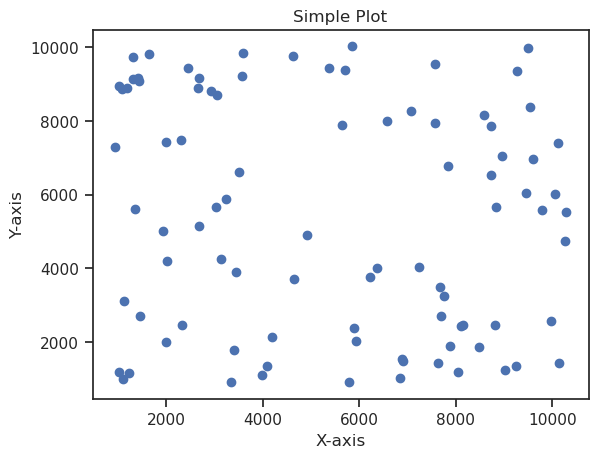

In [28]:
# Create a plot
plt.plot(tab_clean_below["X"], tab_clean_below['Y'], "o")

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Simple Plot')

# Show the plot
plt.show()


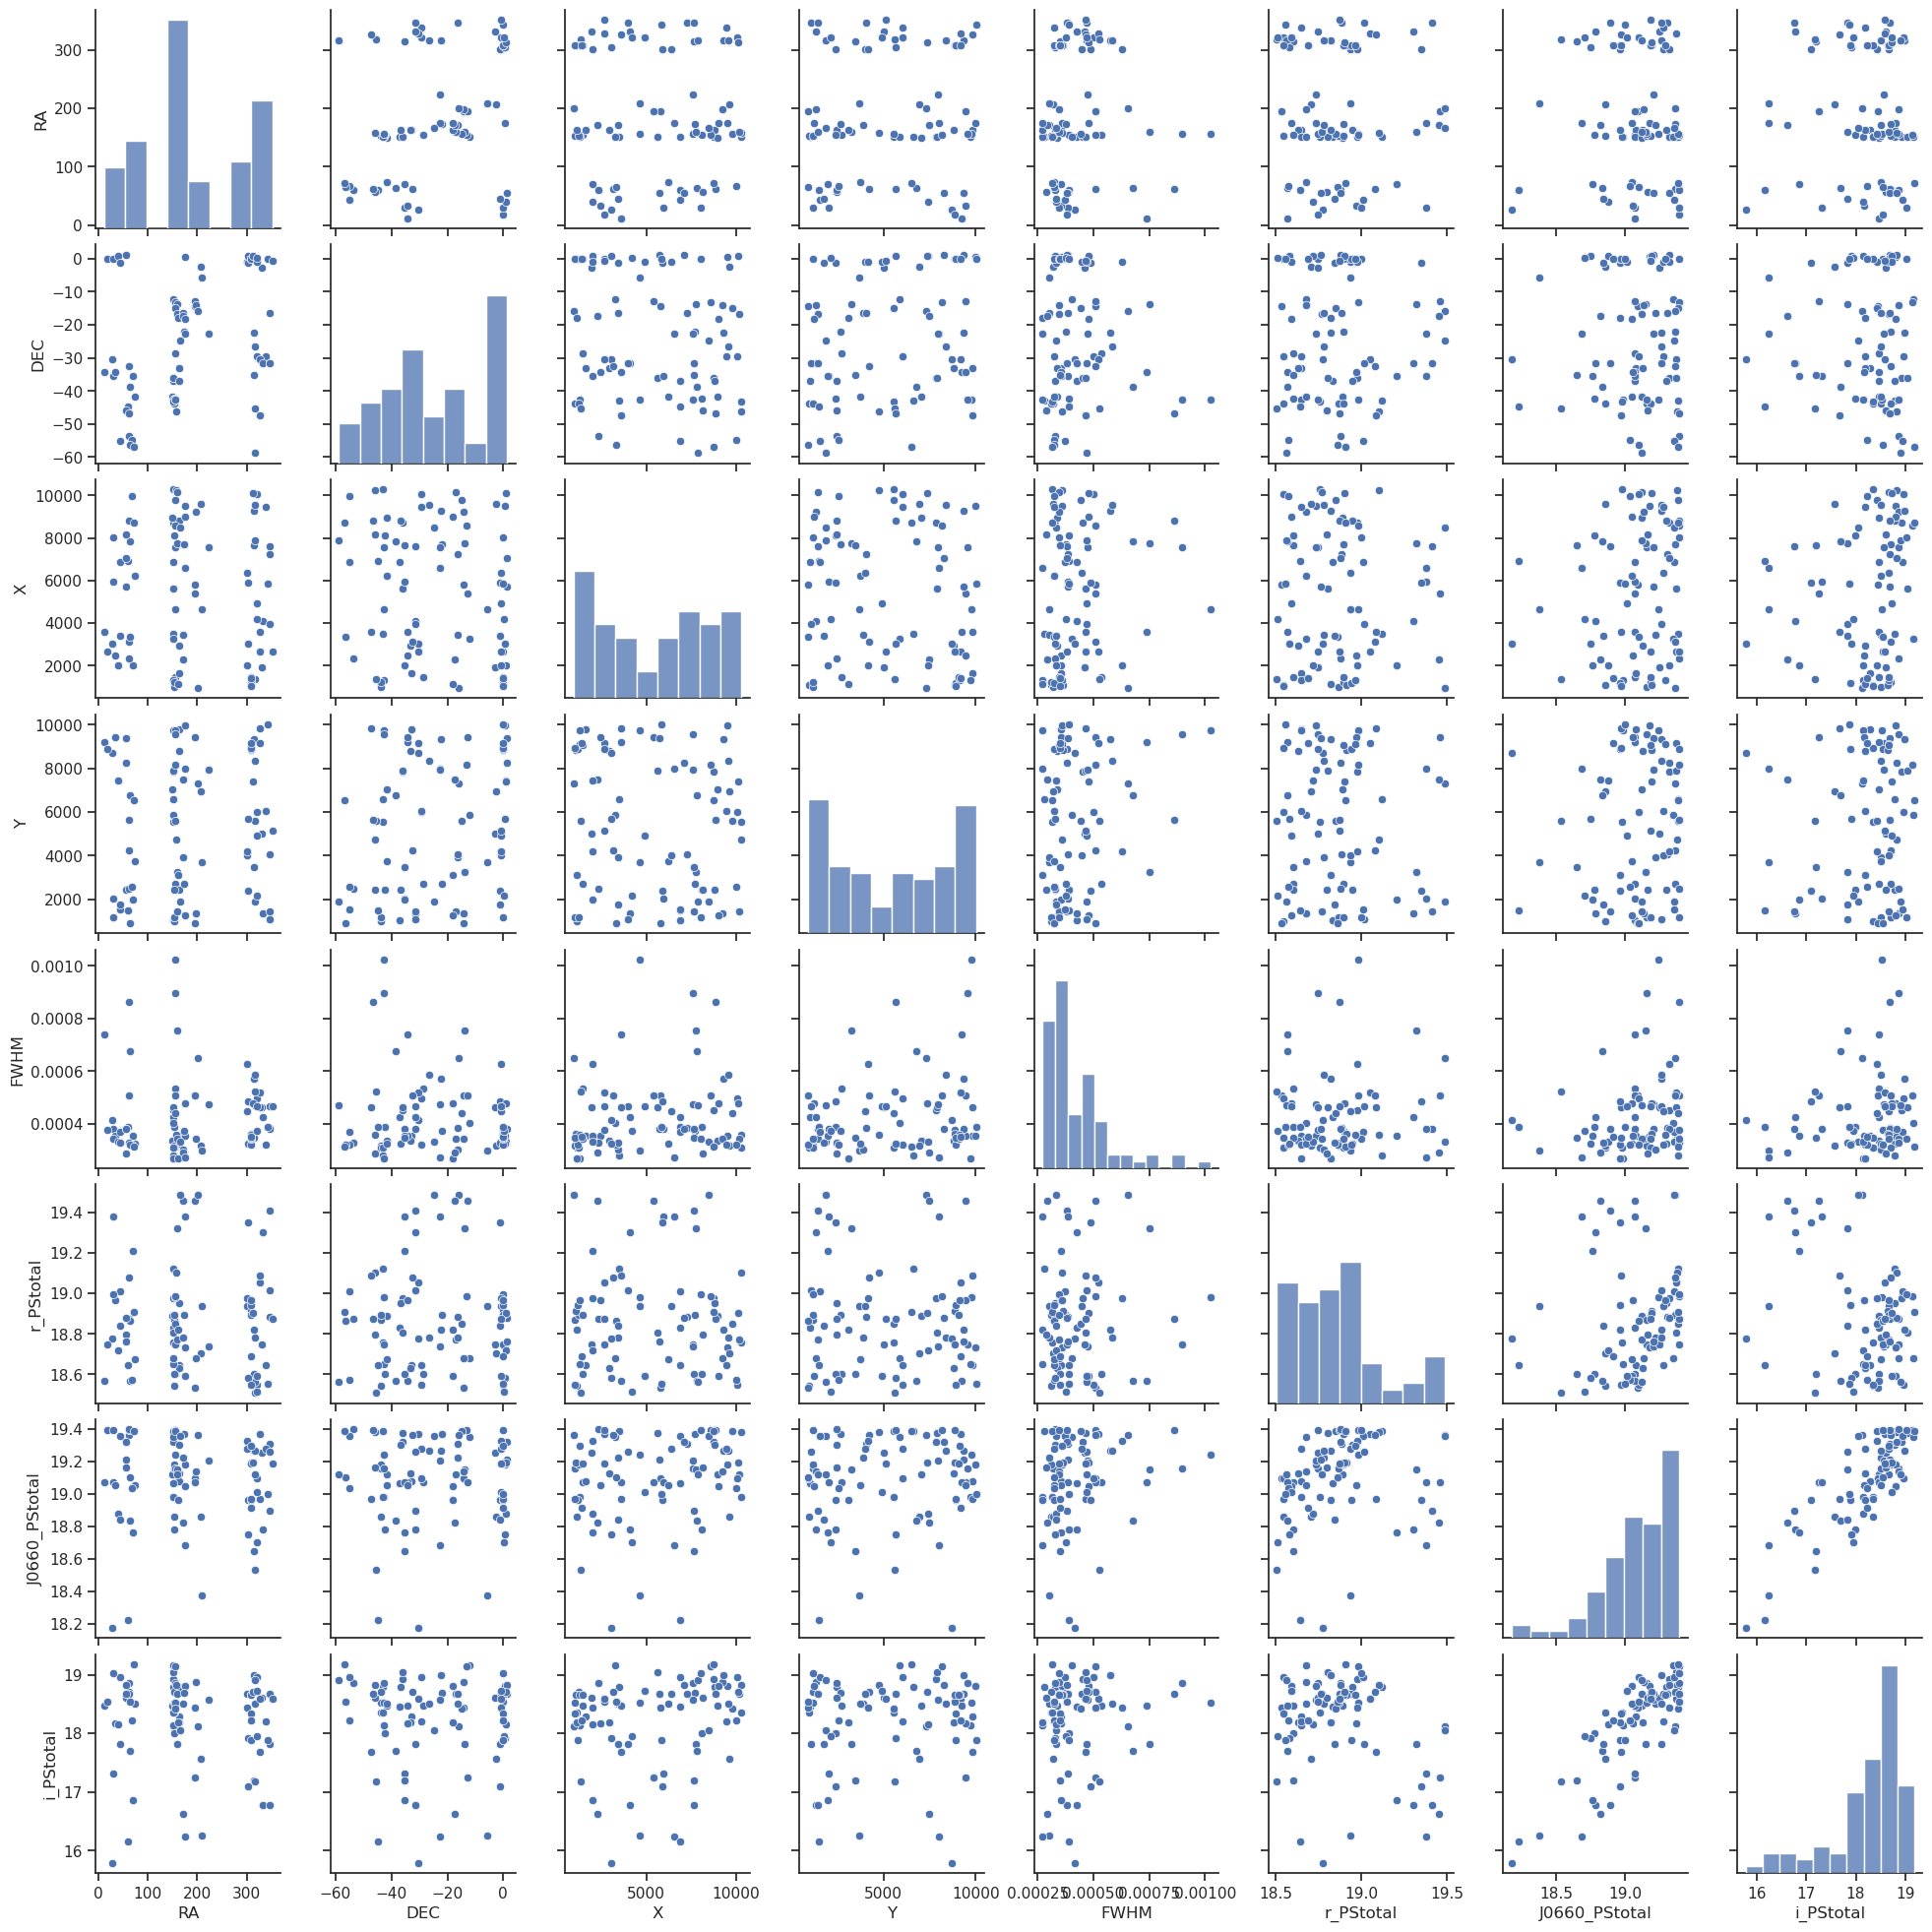

In [29]:
df_bellow = tab_clean_below.to_pandas()
#Select columns 
df_bellow_ = df_bellow[["RA", "DEC", "X", "Y", "FWHM", "r_PStotal", "J0660_PStotal", "i_PStotal"]]
             
sns.pairplot(df_bellow_)

### Object in the upper region

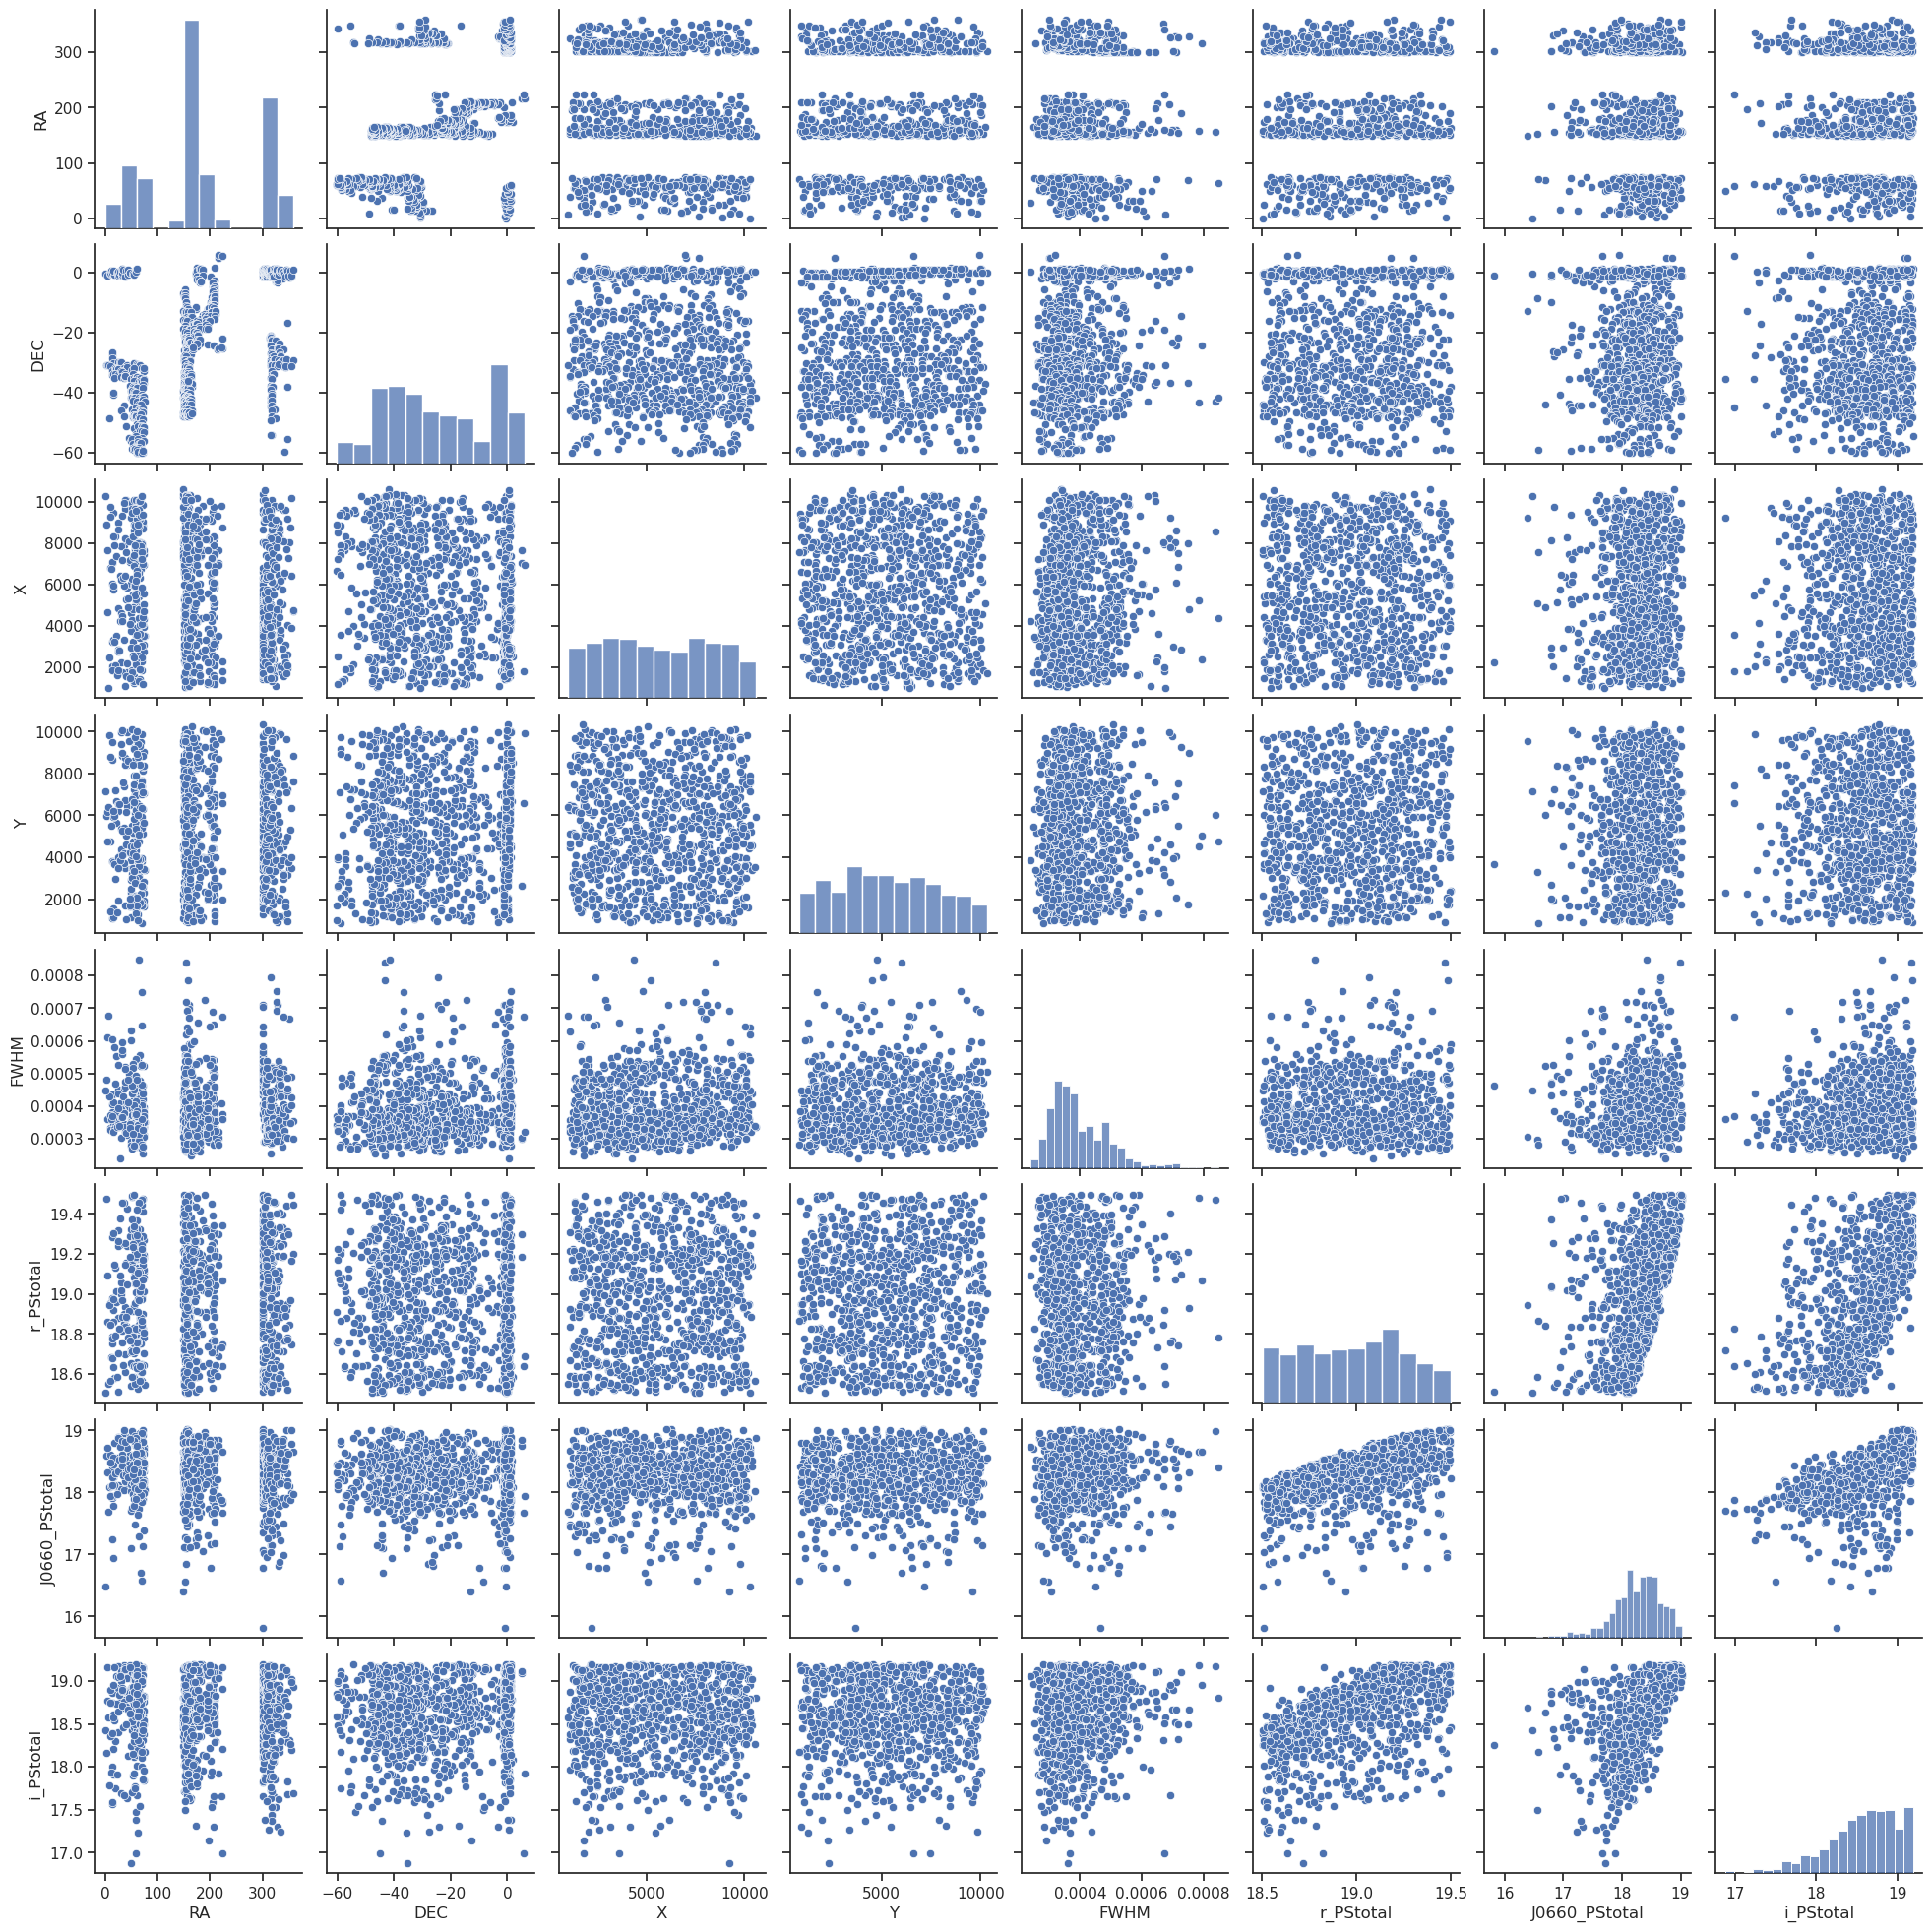

In [30]:
df_upper = tab_clean_upper.to_pandas()
#Select columns 
df_upper_ = df_upper[["RA", "DEC", "X", "Y", "FWHM", "r_PStotal", "J0660_PStotal", "i_PStotal"]]
             
sns.pairplot(df_upper_)

### JUST ONE FIELD

In [31]:
mask_field = tab_clean["Field"] == "b'STRIPE82-0170'"
tab_clean_field = tab_clean[mask_field]

In [32]:
tab_clean_field

Field,ID,RA,DEC,X,Y,FWHM,FWHM_n,ISOarea,KRON_RADIUS,MU_MAX_INST,PETRO_RADIUS,SEX_FLAGS_DET,SEX_NUMBER_DET,CLASS_STAR,s2n_DET_PStotal,THETA,ELLIPTICITY,ELONGATION,FLUX_RADIUS_20,FLUX_RADIUS_50,FLUX_RADIUS_70,FLUX_RADIUS_90,s2n_r_PStotal,s2n_J0660_PStotal,s2n_i_PStotal,FWHM_r,FWHM_n_r,FWHM_J0660,FWHM_n_J0660,FWHM_i,FWHM_n_i,SEX_FLAGS_r,SEX_FLAGS_J0660,SEX_FLAGS_i,CLASS_STAR_r,CLASS_STAR_J0660,CLASS_STAR_i,r_PStotal,e_r_PStotal,g_PStotal,e_g_PStotal,i_PStotal,e_i_PStotal,u_PStotal,e_u_PStotal,z_PStotal,e_z_PStotal,J0378_PStotal,e_J0378_PStotal,J0395_PStotal,e_J0395_PStotal,J0410_PStotal,e_J0410_PStotal,J0430_PStotal,e_J0430_PStotal,J0515_PStotal,e_J0515_PStotal,J0660_PStotal,e_J0660_PStotal,J0861_PStotal,e_J0861_PStotal,r_psf,e_r_psf,g_psf,e_g_psf,i_psf,e_i_psf,u_psf,e_u_psf,z_psf,e_z_psf,J0378_psf,e_J0378_psf,J0395_psf,e_J0395_psf,J0410_psf,e_J0410_psf,J0430_psf,e_J0430_psf,J0515_psf,e_J0515_psf,J0660_psf,e_J0660_psf,J0861_psf,e_J0861_psf
str16,str31,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
b'STRIPE82-0170',b'iDR4_3_STRIPE82-0170_0000092',358.7906119096692,-0.0049760275912256,4139.3633,885.8789,0.00031971044,0.99345046,6.302084e-07,2.459025,16.09467,3.9599998,0,92,0.9831753,-1.0,87.986534,0.09314084,1.1027071,0.6787018,1.1904432,1.5933712,2.275582,52.40309,56.544167,97.5142,0.00033565797,1.0120437,0.0004027952,1.0250158,0.00033858154,1.0698209,0,0,0,1,--,1,18.962276,0.02072397,20.359015,0.05547977,17.753633,0.01113684,23.819433,1.8649906,17.206543,0.011756484,99.0,99.0,99.0,99.0,21.44185,0.44749928,22.937143,1.6331356,20.272772,0.123793215,18.592272,0.019206226,17.343966,0.016347365,18.977,0.043,20.347382,0.065,17.823067,0.033,--,--,17.276094,0.045,--,--,--,--,--,--,--,--,--,--,--,--,17.449095,0.051
b'STRIPE82-0170',b'iDR4_3_STRIPE82-0170_0000130',358.3914992748379,-0.0042493780468852,6751.945,890.6359,0.00035532613,1.1041207,8.4027783e-07,3.03425,16.226639,3.9599998,0,130,0.9770608,-1.0,49.97634,0.08545381,1.0934385,0.7069685,1.3070314,1.7569821,2.6802227,66.830536,59.255188,69.13765,0.00035136548,1.0594034,0.0003863667,0.9832093,0.00034211652,1.0809904,0,0,0,1,1.0,1,18.567667,0.015859611,19.537611,0.03041185,18.222275,0.015378649,99.0,99.0,17.99311,0.020933613,23.364788,1.7471038,22.595749,1.344148,21.260317,0.38112652,20.662588,0.21378906,19.59421,0.07099925,18.50775,0.017887147,18.092539,0.027905105,18.611202,0.036,19.57688,0.044,18.260496,0.046,--,--,18.084951,0.055,--,--,--,--,--,--,--,--,19.49088,0.07,18.497204,0.042,18.208952,0.063
b'STRIPE82-0170',b'iDR4_3_STRIPE82-0170_0000039',358.59271373955727,-0.0071691736887964,5434.8003,871.5218,0.00034855155,1.0830697,4.66821e-07,3.5102527,16.539421,5.2799997,1,39,0.9820482,-1.0,18.623617,0.10286844,1.1146637,0.7171256,1.3108692,1.8377768,2.8243327,38.031906,42.138733,75.3675,0.00030405965,0.9167714,0.00037235182,0.9475448,0.00034991204,1.105622,1,1,1,1,1.0,1,19.388403,0.028554972,20.819033,0.08155866,18.109306,0.014409393,99.0,99.0,17.560047,0.0153857,99.0,99.0,99.0,99.0,22.835386,1.6287801,23.639997,3.1277173,20.616617,0.169731,19.027554,0.025772013,17.703669,0.021298999,19.416,0.056,20.875,0.103,18.168,0.041,--,--,17.62,0.045,--,--,--,--,--,--,--,--,20.74,0.18,19.04,0.051,17.813,0.057
b'STRIPE82-0170',b'iDR4_3_STRIPE82-0170_0000206',358.37501775711854,-0.0001446482541512,6859.832,917.50745,0.00035555215,1.104823,6.302084e-07,3.334753,16.326204,3.3,0,206,0.9817761,-1.0,61

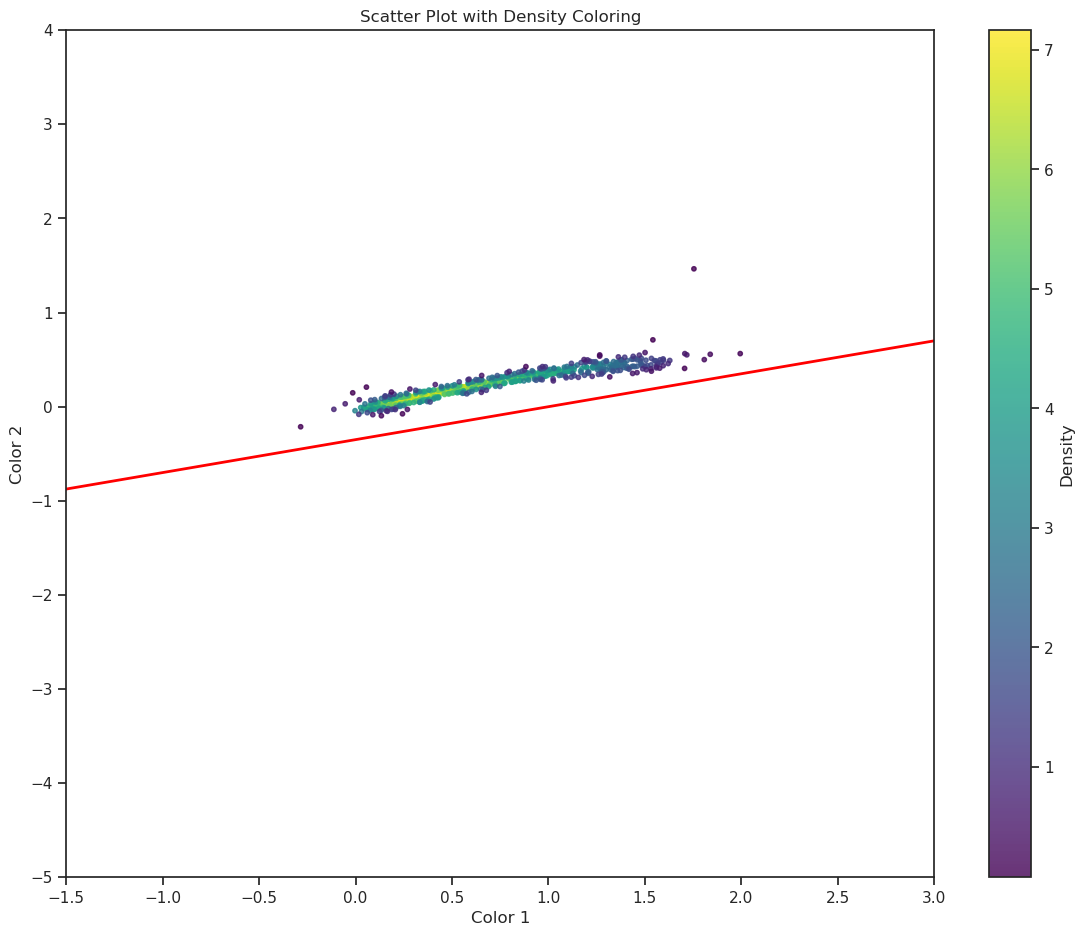

In [33]:
plots(tab_clean_field["r_PStotal"] - tab_clean_field["i_PStotal"], tab_clean_field["r_PStotal"] - tab_clean_field["J0660_PStotal"], x_values, y_values, xlim=(-1.5, 3), ylim=(-5, 4))

In [34]:
import multiprocessing
import dask.dataframe as dd

# Get the number of CPU cores
num_cores = multiprocessing.cpu_count()

# Set n equal to the number of CPU cores
n = num_cores
print(n)

12


In [ ]:
#tab_clean_df = tab_clean.to_pandas()
# Process data in chunks
# Convert Astropy Table to pandas DataFrame
# Assuming `n` is the number of partitions you want
tab_clean_df = tab_clean.to_pandas()

print(tab_clean_df.info(memory_usage='deep'))

#print(tab_clean_df)
#Save Pandas DataFrame to CSV file
#tab_clean_df.to_csv(file_.replace(".csv", "_clean.csv"), index=False)